In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import risk_kit as rk

ind = rk.get_ind_returns()
er = rk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
l = ["Food", "Steel"]
import numpy as np
rk.msr(0.1, np.array(er[l]), cov.loc[l,l])

array([0.75040363, 0.24959637])

### Weights sensitivity to changes in expected returns

vary the expected returns of 2 asset in portfolio to figure out the corresponding weights of portfolio


In [52]:
l = ["Food", "Steel"]
import numpy as np

rk.msr(0.1, np.array(er[l]), cov.loc[l,l])

array([0.75040363, 0.24959637])

In [82]:
# define range of carying expected returns

import pandas as pd
import matplotlib.pyplot as plt

food_mean , steel_mean = er[l][0] , er[l][1]
seed = np.random.default_rng(10105)
food_dist = list(seed.normal(loc = food_mean,scale = 0.01 , size = 30))
steel_dist = list(seed.normal(loc = steel_mean,scale = 0.01 , size = 30))

weights_dist = []
for first_return in food_dist:
    for second_return in steel_dist:
        w = rk.msr(0.1,np.array([first_return,second_return]),cov.loc[l,l])
        weights_dist.append((first_return,second_return,w[0]))

weights_analysis = pd.DataFrame(weights_dist,columns=["first_return","second_return","weights"])

C:\Users\swapn\AppData\Local\Temp\ipykernel_37780\393967976.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


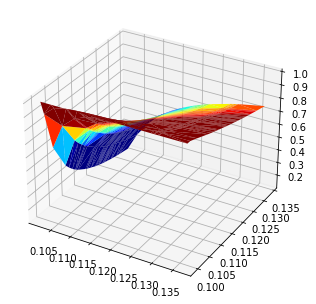

In [91]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_trisurf(weights_analysis.first_return, weights_analysis.second_return, weights_analysis.weights,
                cmap=cm.jet, linewidth=0.2,vmin=0.5,vmax=0.8)
plt.show()

<AxesSubplot:xlabel='Volatility'>

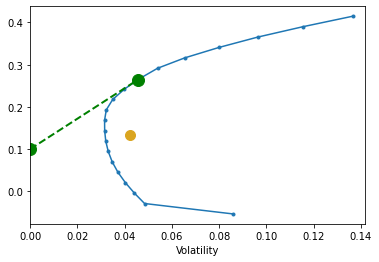

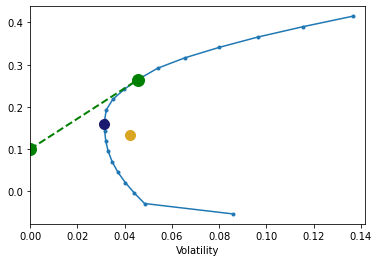

In [97]:
rk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True)
rk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True, show_gmv=True)